# Section 1: Background and Hypothesis

The project was completed by Joshua Kurland and Sviatoslav Shevchenko. It examines the relevance and application of the Phillips Curve (by correlating between housing prices and the unemployment rate) in the context of the Great Recession (2007-2009) and the 20-year period of time before it, from 1987 to 2010. 

The Phillips Curve relates the rate of inflation and the rate of unemployment and is often used for building model to be used for monetary/fiscal policy. In our project we will attempt to use housing prices as a "complementary variable" for the rate of inflation, because generally housing prices are impacted by inflation, and correlating them may just tell to what degree are changes in housing prices dependent on the inflation rate's relationship with the unemployment rate as per the Phillipc Curve. 

There exists two versions (Short-Run Phillips Curve (SRPC) and Long-Run Phillips Cuvre (LRPC)). Namely, according the SRPC, the inflation rate and unemployment rate are inversely correlated. On the other hand, according to the LRPC, there is no relationship between the unemployment rate and the inflation rate in the long-run. The utilization of one or the other depends on the time frame in question. Due to the project being based on the analysis of data coming from a period that is 24 years in length, the drawn hypothesis was based on the framework of the Long-Run Phillips Curve (LRPC) rather then the Short-Run Phillips Curve (SRPC). 

Therefore, the Null Hypothesis that was drawn for the project was; "There is no statistically significant correlation between housing prices and the unemployment rate in the period from 1987 to 2010."

# Section 2: Housing Prices

This section concerns itself with the initial analysis of the housing prices data, which will then be used for testing of the hypothesis made in the paper. First, the public csv file (housingprices.csv, renamed by us) was read and described in order to give more context about its contents. For the purpose of our project, the column with the name "National-US" was used in order to elimanate the possible bias towards a certain region in the United States when comparing the data to the overall unemployment rate in the country. 

In [3]:
import pandas as pd
df1 = pd.read_csv('housingprices.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              348 non-null    object 
 1   AZ-Phoenix        324 non-null    float64
 2   CA-Los Angeles    348 non-null    float64
 3   CA-San Diego      348 non-null    float64
 4   CA-San Francisco  348 non-null    float64
 5   CO-Denver         348 non-null    float64
 6   DC-Washington     348 non-null    float64
 7   FL-Miami          348 non-null    float64
 8   FL-Tampa          348 non-null    float64
 9   GA-Atlanta        300 non-null    float64
 10  IL-Chicago        348 non-null    float64
 11  MA-Boston         348 non-null    float64
 12  MI-Detroit        300 non-null    float64
 13  MN-Minneapolis    324 non-null    float64
 14  NC-Charlotte      348 non-null    float64
 15  NV-Las Vegas      348 non-null    float64
 16  NY-New York       348 non-null    float64
 1

,Date,AZ-Phoenix,CA-Los Angeles,CA-San Diego,CA-San Francisco,CO-Denver,DC-Washington,FL-Miami,FL-Tampa,GA-Atlanta,...,NC-Charlotte,NV-Las Vegas,NY-New York,OH-Cleveland,OR-Portland,TX-Dallas,WA-Seattle,Composite-10,Composite-20,National-US
0,1987-01-01,NaN,59.33,54.67,46.61,50.20,64.11,68.50,77.33,NaN,...,63.39,66.36,74.42,53.53,41.05,NaN,NaN,62.82,NaN,63.75
1,1987-02-01,NaN,59.65,54.89,46.87,49.96,64.77,68.76,77.93,NaN,...,63.94,67.03,75.43,53.50,41.28,NaN,NaN,63.39,NaN,64.15
2,1987-03-01,NaN,59.99,55.16,47.32,50.15,65.71,69.23,77.76,NaN,...,64.17,67.34,76.25,53.68,41.06,NaN,NaN,63.87,NaN,64.49
3,1987-04-01,NaN,60.81,55.85,47.69,50.55,66.40,69.20,77.56,NaN,...,64.81,67.88,77.34,53.75,40.96,NaN,NaN,64.57,NaN,64.99
4,1987-05-01,NaN,61.67,56.35,48.31,50.63,67.27,69.46,77.85,NaN,...,65.18,67.90,79.16,54.71,41.24,NaN,NaN,65.56,NaN,65.57


One of the first issues that we encountered in the context of completing this project was related to the general csv file structure and subsequently the column we were locating. Namely, every row in the csv file represented a month, and due to our unemployment rate in the other csv file (unemployment.csv, renamed by by us) being depicted only by year, it was necessary for us to convert every 12 months in the housingprices.csv to a year.

The graph below represents the initial attempt without considering the months, it essentially depicts all the data points in the csv file, with twelve dots for every year. It serves as a nice visualization for the growth of the hosuing prices, the longer the vertical line of data points, the more severe was the change in housing prices. 

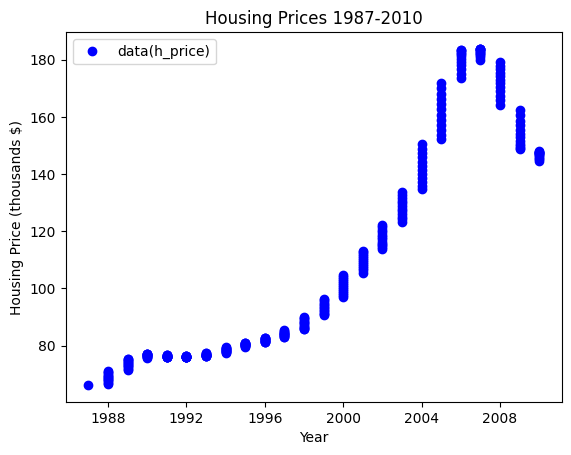

In [5]:
import pandas as pd

df1 = pd.read_csv('housingprices.csv')

start_row = 1
end_row = 288

column_name = 'National-US'
y_data = df1[column_name].rolling(window = 12).mean()[start_row:end_row]
y_data = y_data.astype(float)


x_data = df1.iloc[start_row:end_row, 0].str[:4]
x_data = pd.to_datetime(x_data, format = '%Y')

import numpy as np 
a = x_data
b = y_data 

import matplotlib.pyplot as plt
plt.title('Housing Prices 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price (thousands $)')
plt.plot(a, b, 'ob')
plt.legend(['data(h_price)'])


Consequently we defined the rows with which were were working, taking every 12 and finding the average, depicting it in a scatter plot. 

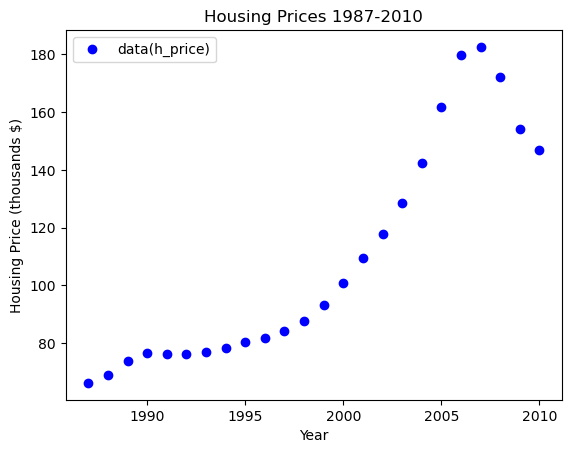

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df1 = pd.read_csv('housingprices.csv')
df1.head()

start_row = 1
end_row = 288

column_name = 'National-US'
y_data = df1[column_name].rolling(window = 12).mean()[start_row:end_row]
y_data = y_data.astype(float)

x_data = df1.iloc[start_row:end_row, 0].str[:4]
x_data = pd.to_datetime(x_data, format = '%Y')

df1_yearly = pd.DataFrame({'x': x_data, 'y': y_data})
df1_yearly['year'] = df1_yearly['x'].dt.year
df1_yearly = df1_yearly.groupby('year', as_index=False).mean()

a = df1_yearly['year']
b = df1_yearly['y']

plt.title('Housing Prices 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price (thousands $)')
plt.plot(a, b, 'ob')
plt.legend(['data(h_price)'])
plt.show()

A linear regression line was then produced, which predicted the housing price for the next year outside of our time frame (2011). Although this prediction is a result of the trend line that was drawn, it most likely does not mean that is the next value and overall, values outside of our given time frame are unlikely to be predicted. This regression line shows the trend only within the time frame from 1987 to 2010 and it is strongly conditional.

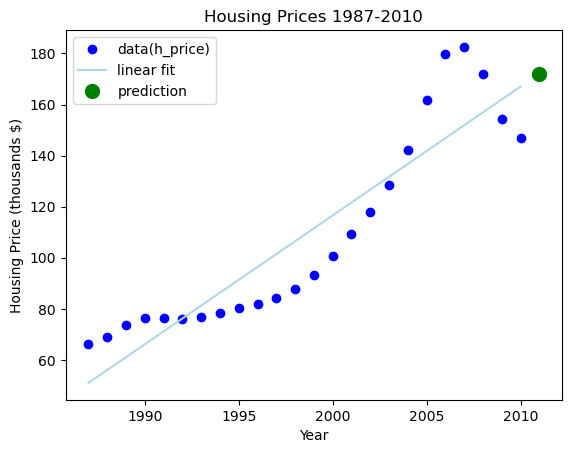

According to the linear regression model, the prediction for the hosuing price in 2011 is about $172.08 thousand.


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(a.to_numpy().reshape(-1, 1), b.to_numpy())

prediction = model.predict([[2011]])

plt.plot(a, b, 'ob')
plt.plot(a, model.predict(a.to_numpy().reshape(-1, 1)), color = 'lightblue')
plt.plot(2011, prediction, 'og', markersize=10)
plt.legend(['data(h_price)', 'linear fit', 'prediction'])
plt.title('Housing Prices 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price (thousands $)')
plt.show()

print(f'According to the linear regression model, the prediction for the hosuing price in 2011 is about ${prediction[0]:.2f} thousand.')

Finding the R^2 value with test data to judge the goodness of fit.

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(a_train, b_train)

b_pred = regression_model.predict(a_test)

r2 = r2_score(b_test, b_pred)

print(f'R^2 value of Housing Prices 1987-2010: {r2}')

R^2 value of Housing Prices 1987-2010: 0.8192005145221801


The produced R^2 value merely provides sense for the concept of demand-pull inflation and its explanation by the Keynesian theory. Over the increasing number value of the year, there is a constant rise in price, suiting a linear fit, with the R^2 value being close to 1. Thus, the year could be used as a decent predictor of the housing price. 

Then, we utilized the k-nearest neighbors machine learning algorithmn. For it we varied the k(nearest neighbors parameter) from 1 to 3. 

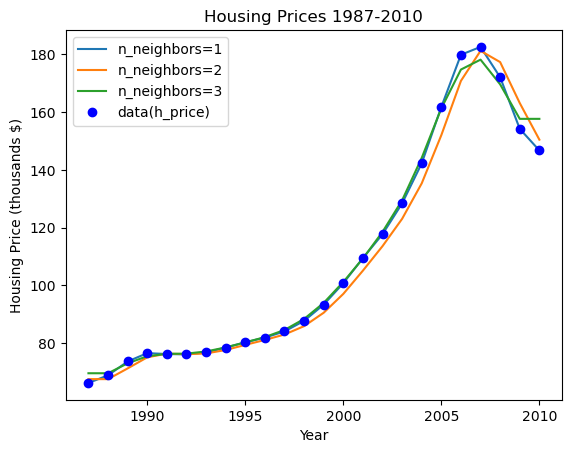

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

a = np.linspace(1987, 2010, 24)
b = b

a = a.reshape(-1, 1)

for n_neighbors in [1, 2, 3]:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(a, b)
    bhat = model.predict(a)
    plt.plot(a, bhat, label=f'n_neighbors={n_neighbors}')

plt.plot(a, b, 'ob', label='data(h_price)')

plt.legend()
plt.title('Housing Prices 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price (thousands $)')
plt.show()

Thereafter, we utilized the decision tree regressor machine learning algorithmn. For it we varied the maximum depth from 4 to 6. 

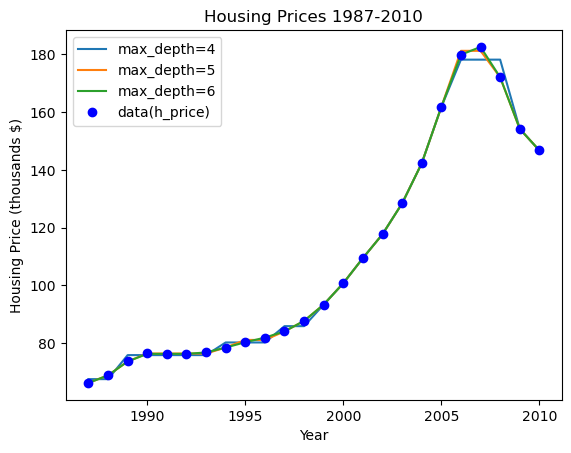

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

a = np.linspace(1987, 2010, 24)
b = b

a = a.reshape(-1, 1)

for max_depth in [4, 5, 6]:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(a, b)
    bhat = model.predict(a)
    plt.plot(a, bhat, label=f'max_depth={max_depth}')

plt.plot(a, b, 'ob', label='data(h_price)')

plt.legend()
plt.title('Housing Prices 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price (thousands $)')
plt.show()

# Section 3: Unemployment

In [12]:
df2 = pd.read_csv('unemployment.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  71 non-null     int64  
 1   population            71 non-null     int64  
 2   labor_force           71 non-null     int64  
 3   population_percent    71 non-null     float64
 4   employed_total        71 non-null     int64  
 5   employed_percent      71 non-null     float64
 6   agrictulture_ratio    71 non-null     int64  
 7   nonagriculture_ratio  71 non-null     int64  
 8   unemployed            71 non-null     int64  
 9   unemployed_percent    71 non-null     float64
 10  not_in_labor          71 non-null     int64  
 11  footnotes             21 non-null     float64
dtypes: float64(4), int64(8)
memory usage: 6.8 KB


,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


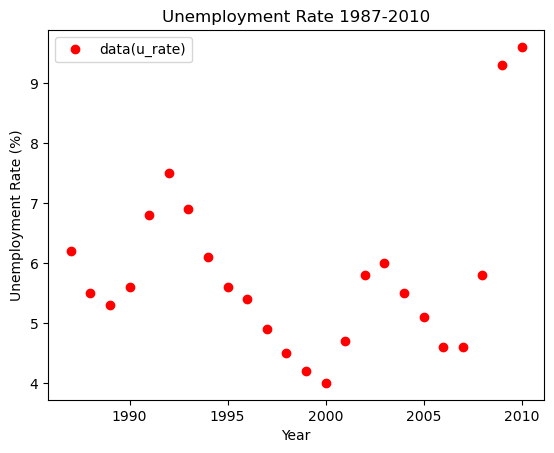

In [13]:
import pandas as pd

df2 = pd.read_csv('unemployment.csv')

start_row = 47
end_row = 72

column_name = 'unemployed_percent'
y_data = df2[column_name][start_row:end_row]
y_data = y_data.astype(float)


column_name = 'year'
x_data = df2[column_name][start_row:end_row]
x_data = x_data.astype(float)

import numpy as np 
x = x_data
y = y_data 

import matplotlib.pyplot as plt
plt.title('Unemployment Rate 1987-2010')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.plot(x, y, 'or')
plt.legend(['data(u_rate)'])


A linear regression line was then produced, which predicted the unemployment rate for the next year outside of our time frame (2011). Although this prediction is a result of the trend line that was drawn, it most likely does not demonstrate the next actual value and overall, values outside of our given time frame are unlikely to be predicted. This regression line shows the trend only within the time frame from 1987 to 2010 and it is strongly conditional.

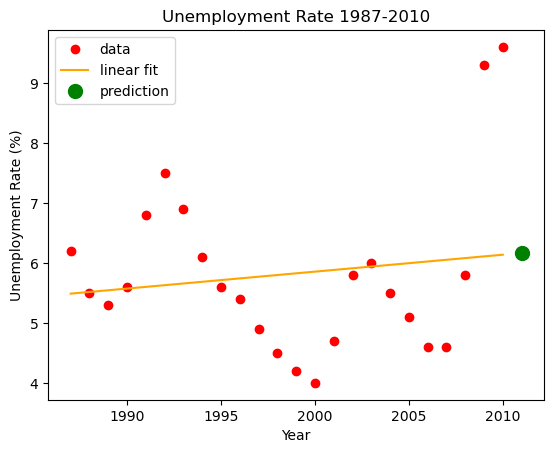

According to the linear regression model, the prediction for the unemployment rate in 2011 is about 6.17%.


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.to_numpy().reshape(-1, 1), y.to_numpy())
prediction = model.predict([[2011]])

plt.plot(x, y, 'or')
plt.plot(x, model.predict(x.to_numpy().reshape(-1, 1)), color = 'orange')
plt.plot(2011, prediction, 'og', markersize=10)
plt.legend(['data', 'linear fit', 'prediction'])
plt.title('Unemployment Rate 1987-2010')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

print(f'According to the linear regression model, the prediction for the unemployment rate in 2011 is about {prediction[0]:.2f}%.')

Then, we utilized the k-nearest neighbors machine learning algorithmn. For it we varied the k(nearest neighbors parameter) from 1 to 3.

Finding the R^2 value with test data to judge the goodness of fit.

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

y_pred = regression_model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2 value of Housing Prices 1987-2010: {r2}')

R^2 value of Housing Prices 1987-2010: -0.9075303100165117


In hindsight, it is obvious that an R^2 value signifies an issue with either the model or the data itself. In this case the model would be unsuitable due to it not being to capture the all the relationships with other factors that the unemployement is influenced by, thus making a linear model invalid for use.

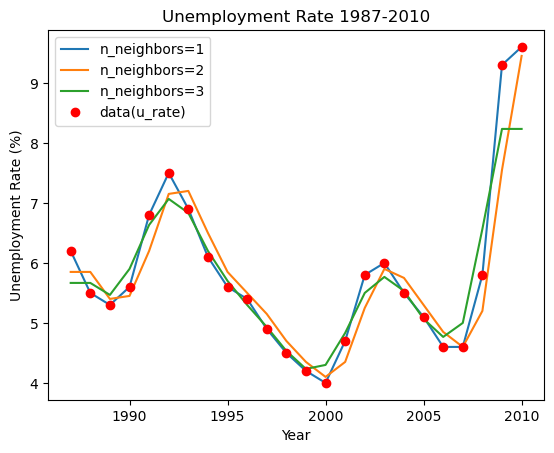

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

x = np.linspace(1987, 2010, 24)
y = y

x = x.reshape(-1, 1)

for n_neighbors in [1, 2, 3]:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x, y)
    yhat = model.predict(x)
    plt.plot(x, yhat, label=f'n_neighbors={n_neighbors}')

plt.plot(x, y, 'or', label='data(u_rate)')

plt.legend()
plt.title('Unemployment Rate 1987-2010')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

Thereafter, we utilized the decision tree regressor machine learning algorithmn. For it we varied the maximum depth from 4 to 6. 

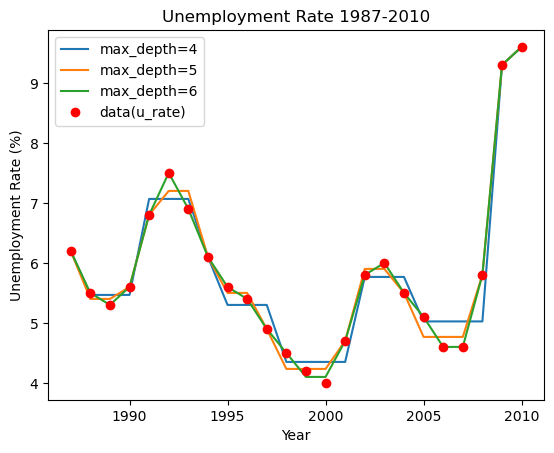

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

x = np.linspace(1987, 2010, 24)
y = y

x = x.reshape(-1, 1)

for max_depth in [4, 5, 6]:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x, y)
    yhat = model.predict(x)
    plt.plot(x, yhat, label=f'max_depth={max_depth}')

plt.plot(x, y, 'or', label='data(u_rate)')

plt.legend()
plt.title('Unemployment Rate 1987-2010')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Section 4: Regression Comparison and Results

Comparing the regressions that we produced was a task that we had to approach with the consideration of "visual statistics". That is we had to determine a way in which we could compare the regressions on the same scale in order to graphically represent them side by side. 

First, we represented the data side by side in its original nominal values in terms of the line of best fit linear regression

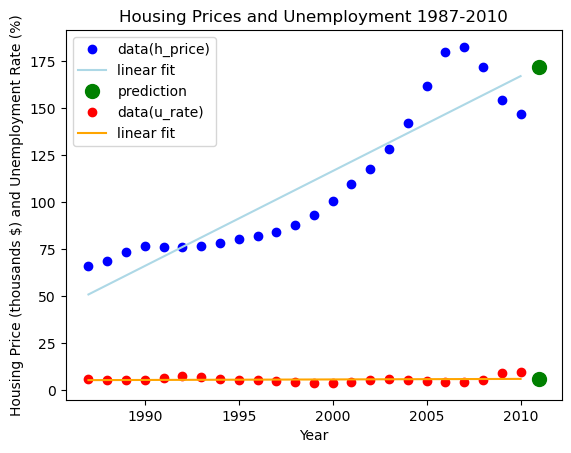

In [504]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#Line of best fit linear regression for the Housing Prices

model.fit(a.reshape(-1, 1), b)
prediction = model.predict([[2011]])
plt.plot(a, b, 'ob')
plt.plot(a, model.predict(a.reshape(-1, 1)), color = 'lightblue')
plt.plot(2011, prediction, 'og', markersize=10)


#Line of best fit linear regression for the Unemployment Rate

model.fit(a.reshape(-1, 1), y)
prediction = model.predict([[2011]])

plt.plot(x, y, 'or')
plt.plot(x, model.predict(x.reshape(-1, 1)), color = 'orange')
plt.plot(2011, prediction, 'og', markersize=10)
plt.legend(['data(h_price)', 'linear fit', 'prediction', 'data(u_rate)', 'linear fit'])

plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price (thousands $) and Unemployment Rate (%)')
plt.show()

After, we attempted to scale down the larger value of the housing price to a comparatively close value to the unemployment rate. this we achieved by dividing all the hosuing price values by 15, producing the graph below. 

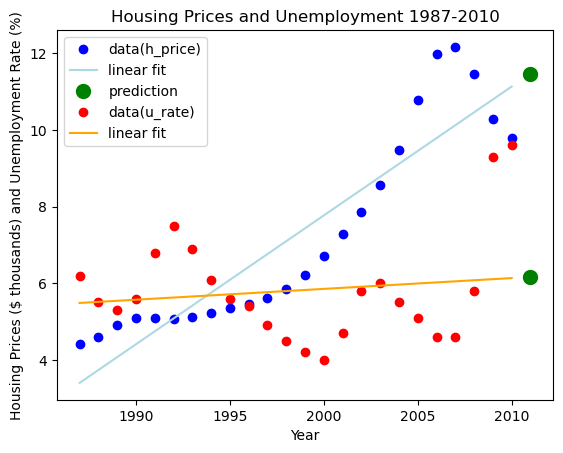

In [505]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#Line of best fit linear regression for the Housing Prices (adjust by dividing by 15)

model.fit(a.reshape(-1,1),b/15)

prediction = model.predict([[2011]])

plt.plot(a, b/15, 'ob')
plt.plot(a,model.predict(a.reshape(-1, 1)), color = 'lightblue')
plt.plot(2011, prediction, 'og', markersize=10)


#Line of best fit linear regression for the Unemployment Rate

model.fit(a.reshape(-1, 1), y)

prediction = model.predict([[2011]])

plt.plot(x, y, 'or')
plt.plot(x, model.predict(x.reshape(-1, 1)), color = 'orange')
plt.plot(2011, prediction, 'og', markersize=10)
plt.legend(['data(h_price)', 'linear fit', 'prediction', 'data(u_rate)', 'linear fit'])


plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Prices ($ thousands) and Unemployment Rate (%)')
plt.show()


However, although the method of dividing the larger values of the housing prices by 15 did produce a graph of values close by to be compared visually by the human eye, the method was statistically false. 

Due to that fact, we utilized a method named "normalization", which would help us take the two datasets of different nominal values on different scales and scale them down to the same scale in order to visually represent. These normalized new datasets were then used for further comparisons and for the drawing of results based on the visual representations of the datasets' comparisons. 

The normalization algorithm is depicted below. It involves taking each value in the data set and manipulating it, producing a completely new data set with the new amended values. The amendment was to take the value, subtract the minimum value of the data set from it and divide that difference by the difference of the maximum value in the list and the minimum value in the list. 

Below are represented for each data set; the unchanged a and x values of the years, the original values b and y of the housing prices and the unemployment rate, and the manipulated values of b and y of the housing prices and the unemployment rate. 

In [506]:
def normalized(lst):
    norm_list = []
    for value in lst:
        norm_value = (value - min(lst))/(max(lst)-min(lst))
        norm_list.append(norm_value)
    return norm_list

print(a)
print(b.values)
print(normalized(b.values))

print(x)
print(y.values)
print(normalized(y.values))    

[[1987.]
 [1988.]
 [1989.]
 [1990.]
 [1991.]
 [1992.]
 [1993.]
 [1994.]
 [1995.]
 [1996.]
 [1997.]
 [1998.]
 [1999.]
 [2000.]
 [2001.]
 [2002.]
 [2003.]
 [2004.]
 [2005.]
 [2006.]
 [2007.]
 [2008.]
 [2009.]
 [2010.]]
[ 66.27583333  68.903125    73.69659722  76.58298611  76.27395833
  76.15319444  76.81048611  78.52486111  80.35173611  81.95451389
  84.10340278  87.74611111  93.38888889 100.78291667 109.48527778
 117.73895833 128.40381944 142.27479167 161.77576389 179.84243056
 182.55       172.04916667 154.20041667 146.72666667]
[0.0, 0.022595661117043874, 0.06382126057426542, 0.08864525176367168, 0.08598750080628415, 0.08494888756698145, 0.0906018342662338, 0.10534608098197035, 0.12105786849567719, 0.13484233862972336, 0.1533235623657687, 0.18465217505560388, 0.2331821102900952, 0.29677343061299094, 0.37161689206783777, 0.4426015380315205, 0.534323211184294, 0.6536186025844093, 0.8213340356962832, 0.9767139208814417, 1.0, 0.9096890252205637, 0.7561833023959177, 0.6919063420507565]
[[1

Represented below is the comparison of the normalized line of best fit linear regressions.

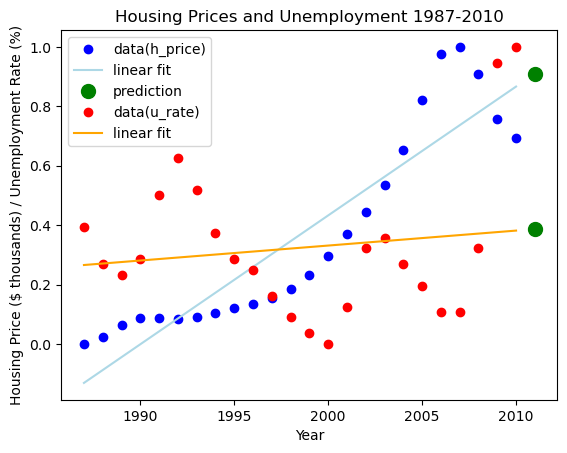

In [507]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#Line of best fit linear regression for the Housing Prices (Normalized)

model.fit(a.reshape(-1, 1), normalized(b))

prediction = model.predict([[2011]])

plt.plot(a, normalized(b), 'ob')
plt.plot(a, model.predict(a.reshape(-1, 1)), color = 'lightblue')
plt.plot(2011, prediction, 'og', markersize=10)
plt.legend(['data', 'linear fit', 'prediction'])

#Line of best fit linear regression for the Unemployment Rate (Normalized)

model.fit(a.reshape(-1, 1), normalized(y))

prediction = model.predict([[2011]])

plt.plot(x, normalized(y), 'or')
plt.plot(x, model.predict(x.reshape(-1, 1)), color = 'orange')
plt.plot(2011, prediction, 'og', markersize=10)
plt.legend(['data(h_price)', 'linear fit', 'prediction', 'data(u_rate)', 'linear fit'])


plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

Below is the comparison of the k-nearest neighbors machine learning algorithmn of the two normalized data sets, which is visualized by varying the k(nearest neighbors parameter) from 1 to 3.

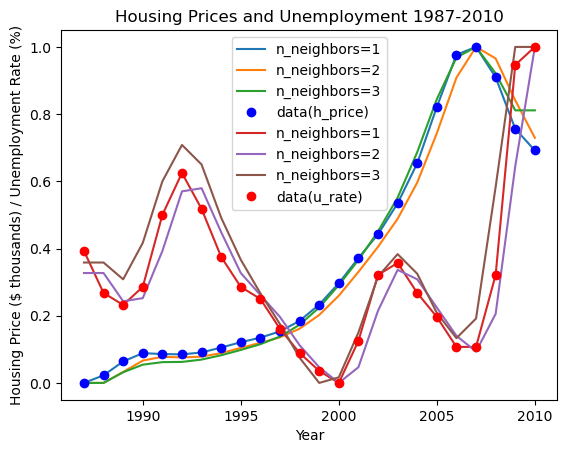

In [508]:
#KNeighborsRegressor for the Housing Prices (Normalized)

a = np.linspace(1987, 2010, 24)
b = normalized(b)

a = a.reshape(-1, 1)

for n_neighbors in [1, 2, 3]:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(a, normalized(b))
    bhat = model.predict(a)
    plt.plot(a, normalized(bhat), label=f'n_neighbors={n_neighbors}')

plt.plot(a, normalized(b), 'ob', label='data(h_price)')


#KNeighborsRegressor for the Unemployemnt Rate (Normalized)

x = np.linspace(1987, 2010, 24)
y = normalized(y)

x = x.reshape(-1, 1)

for n_neighbors in [1, 2, 3]:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x, normalized(y))
    yhat = model.predict(x)
    plt.plot(x, normalized(yhat), label=f'n_neighbors={n_neighbors}')

plt.plot(x, normalized(y), 'or', label='data(u_rate)')

plt.legend()
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()


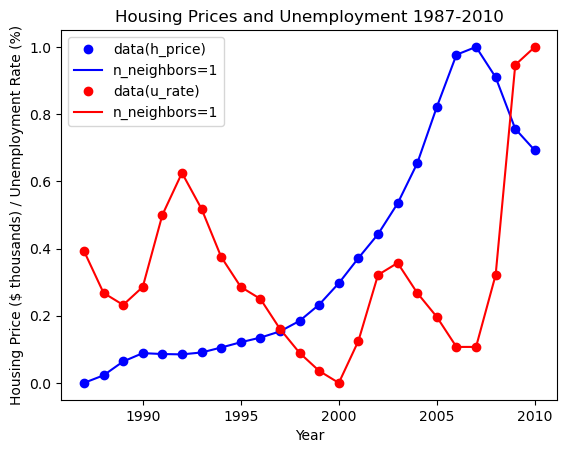

In [509]:
#KNeighborsRegressor(n_neighbors=1) for Housing Prices (Normalized)

model = KNeighborsRegressor(n_neighbors = 1)

a = np.linspace(1987, 2010, 24)
a = a.reshape(-1,1)

model.fit(a,normalized(b))
bhat = model.predict(a)
plt.plot(a,normalized(b), 'ob', label='data(h_price)')
plt.plot(a,normalized(bhat), color = 'blue')

#KNeighborsRegressor(n_neighbors=1) for the Unemployemnt Rate (Normalized)

model = KNeighborsRegressor(n_neighbors = 1) 

x = np.linspace(1987, 2010, 24)
x = x.reshape(-1,1)

model.fit(x,normalized(y))
yhat = model.predict(x)
plt.plot(x,normalized(y),'or')
plt.plot(x,normalized(yhat), color = 'red')

plt.legend(['data(h_price)', 'n_neighbors=1', 'data(u_rate)', 'n_neighbors=1'])
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

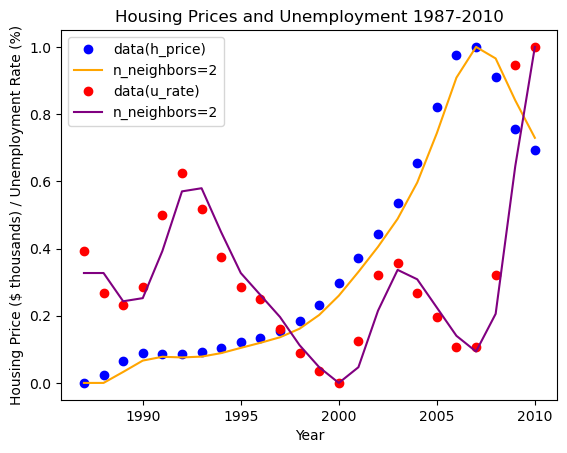

In [510]:
#KNeighborsRegressor(n_neighbors=2) for Housing Prices (Normalized)

model = KNeighborsRegressor(n_neighbors = 2)

a = np.linspace(1987, 2010, 24)
a = a.reshape(-1,1)

model.fit(a,normalized(b))
bhat = model.predict(a)
plt.plot(a,normalized(b), 'ob', label='data(h_price)')
plt.plot(a,normalized(bhat), color = 'orange')


#KNeighborsRegressor(n_neighbors=2) for the Unemployemnt Rate (Normalized)

model = KNeighborsRegressor(n_neighbors = 2) 

x = np.linspace(1987, 2010, 24)
x = x.reshape(-1,1)

model.fit(x,normalized(y))
yhat = model.predict(x)
plt.plot(x,normalized(y),'or', label='data(u_rate)')
plt.plot(x,normalized(yhat), color = 'purple')

plt.legend(['data(h_price)', 'n_neighbors=2', 'data(u_rate)', 'n_neighbors=2'])
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

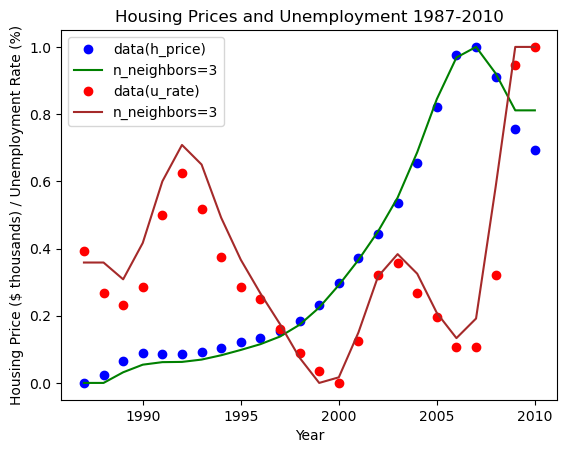

In [511]:
#KNeighborsRegressor(n_neighbors=3) for Housing Prices (Normalized)

model = KNeighborsRegressor(n_neighbors = 3)

a = np.linspace(1987, 2010, 24)
a = a.reshape(-1,1)

model.fit(a,normalized(b))
bhat = model.predict(a)
plt.plot(a,normalized(b), 'ob', label='data(h_price)')
plt.plot(a,normalized(bhat), color = 'green')


#KNeighborsRegressor(n_neighbors=3) for the Unemployemnt Rate (Normalized)

model = KNeighborsRegressor(n_neighbors = 3) 

x = np.linspace(1987, 2010, 24)
x = x.reshape(-1,1)

model.fit(x,normalized(y))
yhat = model.predict(x)
plt.plot(x,normalized(y),'or', label='data(u_rate)')
plt.plot(x,normalized(yhat), color = 'brown')

plt.legend(['data(h_price)', 'n_neighbors=3', 'data(u_rate)', 'n_neighbors=3'])
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

Below is the comparison of the decision tree regressor machine learning algorithmn of the two normalized data sets, which is visualized by varying the k(nearest neighbors parameter) from 1 to 3.

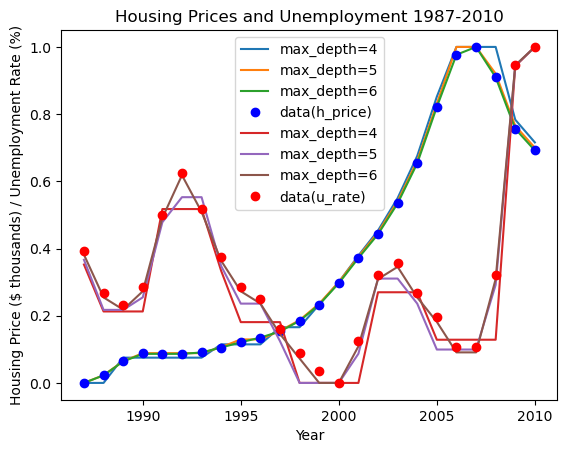

In [512]:
#DecisionTreeRegressor for Housing Prices (Normalized)

a = np.linspace(1987, 2010, 24)
b = normalized(b)

a = a.reshape(-1, 1)

for max_depth in [4, 5, 6]:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(a, normalized(b))
    bhat = model.predict(a)
    plt.plot(a, normalized(bhat), label=f'max_depth={max_depth}')

plt.plot(a, normalized(b), 'ob', label='data(h_price)')


#DecisionTreeRegressor for the Unemployment Rate (Nprmalized)

x = np.linspace(1987, 2010, 24)
y = normalized(y)

x = x.reshape(-1, 1)

for max_depth in [4, 5, 6]:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x, normalized(y))
    yhat = model.predict(x)
    plt.plot(x, normalized(yhat), label=f'max_depth={max_depth}')

plt.plot(x, normalized(y), 'or', label='data(u_rate)')

plt.legend()
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

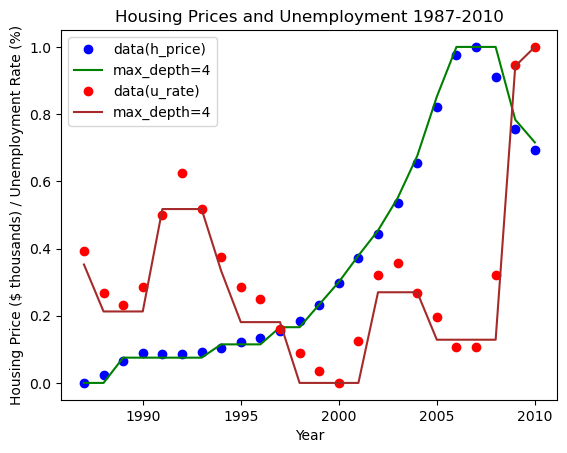

In [513]:
from sklearn.tree import DecisionTreeRegressor

#DecisionTreeRegressor(max_depth=4) for Housing Prices (Normalized)

model = DecisionTreeRegressor(max_depth = 4) 
a = np.linspace(1987, 2010, 24)
a = a.reshape(-1, 1)
model.fit(a,normalized(b))
bhat = model.predict(a)
plt.plot(a,normalized(b),'ob')
plt.plot(a,normalized(bhat), color = 'green')


#DecisionTreeRegressor(max_depth=4) for the Unemployment Rate (Nprmalized)

model = DecisionTreeRegressor(max_depth = 4) 
x = np.linspace(1987, 2010, 24)
x = x.reshape(-1, 1)
model.fit(x,normalized(y))
yhat = model.predict(x)
plt.plot(x,normalized(y),'or')
plt.plot(x,normalized(yhat), color = 'brown')

plt.legend(['data(h_price)', 'max_depth=4', 'data(u_rate)', 'max_depth=4'])
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

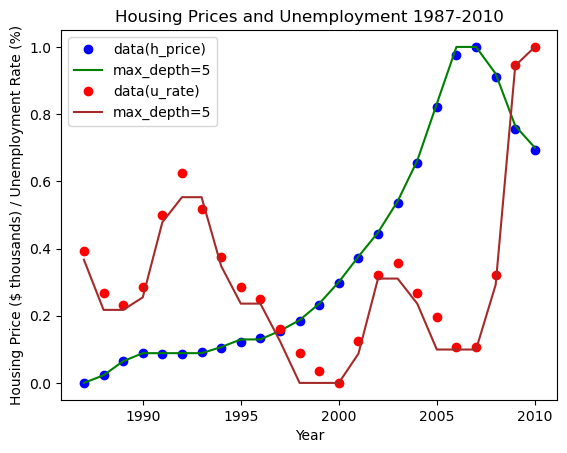

In [514]:
from sklearn.tree import DecisionTreeRegressor

#DecisionTreeRegressor(max_depth=5) for Housing Prices (Normalized)

model = DecisionTreeRegressor(max_depth = 5) 
a = np.linspace(1987, 2010, 24)
a = a.reshape(-1, 1)
model.fit(a,normalized(b))
bhat = model.predict(a)
plt.plot(a,normalized(b),'ob')
plt.plot(a,normalized(bhat), color = 'green')


#DecisionTreeRegressor(max_depth=5) for the Unemployment Rate (Nprmalized)

model = DecisionTreeRegressor(max_depth = 5) 
x = np.linspace(1987, 2010, 24)
x = x.reshape(-1, 1)
model.fit(x,normalized(y))
yhat = model.predict(x)
plt.plot(x,normalized(y),'or')
plt.plot(x,normalized(yhat), color = 'brown')

plt.legend(['data(h_price)', 'max_depth=5', 'data(u_rate)', 'max_depth=5'])
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

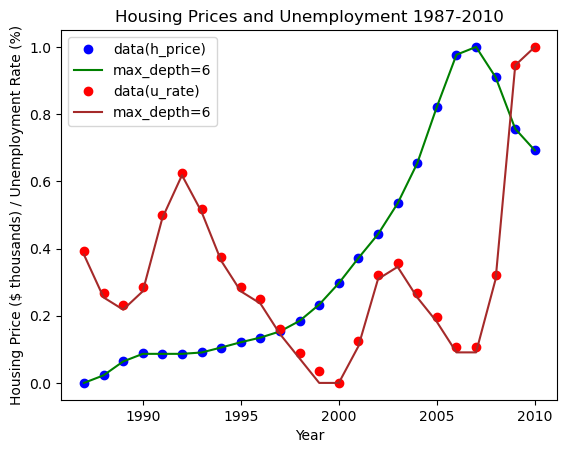

In [515]:
from sklearn.tree import DecisionTreeRegressor

#DecisionTreeRegressor(max_depth=6) for Housing Prices (Normalized)

model = DecisionTreeRegressor(max_depth = 6) 
a = np.linspace(1987, 2010, 24)
a = a.reshape(-1, 1)
model.fit(a,normalized(b))
bhat = model.predict(a)
plt.plot(a,normalized(b),'ob')
plt.plot(a,normalized(bhat), color = 'green')


#DecisionTreeRegressor(max_depth=6) for the Unemployment Rate (Nprmalized)

model = DecisionTreeRegressor(max_depth = 6) 
x = np.linspace(1987, 2010, 24)
x = x.reshape(-1, 1)
model.fit(x,normalized(y))
yhat = model.predict(x)
plt.plot(x,normalized(y),'or')
plt.plot(x,normalized(yhat), color = 'brown')

plt.legend(['data(h_price)', 'max_depth=6', 'data(u_rate)', 'max_depth=6'])
plt.title('Housing Prices and Unemployment 1987-2010')
plt.xlabel('Year')
plt.ylabel('Housing Price ($ thousands) / Unemployment Rate (%)')
plt.show()

# Section 5: Conclusion

From the comparisons of the various regression models with varying parameters between the housing prices data and the unemployment rate data, there is no clear correlation of the data from 1987 to 2010. Naturally, that is true due to the fact that the LRPC predicts there to be none. This is proven by the calculation of the data points' correlation coefficient below, which is 0.061. Apparently due to the time frame being so long and the economy changing so much within it, there were simply many other factors except the unemployment rate's relationship with the inflation rate which led to the hosuing prices behaving how they did. 

In [522]:
#correlation coefficient calculation between Housing Prices and the Unemployment Rate from 1987 to 2010
import scipy.stats
corr_coef_1, p_value_1 = scipy.stats.pearsonr(b, y)
print("Correlation Coefficient: {:.3f}".format(corr_coef_1))
print("p-value: {:.3f}".format(p_value_1))


Correlation Coefficient: 0.061
p-value: 0.777


However, we decided to look deeper into the correlation of the data points due to there being sections of the regression graphs that did appear to visually depict an apparent correlation. Thus, we decided to split the data points into two time frames; from 1987 to 2002 and from 2003 to 2010. This split was motivated by the year 2003 marking a very steep increase in housing prices.

It was interesting to discover that the correlation coefficient between the data points from 1987 to 2002 equalled to -0.481, and inverse one. Thus, just by narrowing the time frame we could affect the correlation coefficient. This most likely means that the shorter a time frame is, the less influence do other factors have on the inflation rate's reltionship with the unemployment rate in regards to housing prices.


In [523]:
#correlation coefficient calculation between Housing Prices and the Unemployment Rate from 1987 to 2002

df1 = pd.read_csv('housingprices.csv')
df1.head()

start_row = 1
end_row = 192

column_name = 'National-US'
y_data = df1[column_name].rolling(window = 12).mean()[start_row:end_row]
y_data = y_data.astype(float)

x_data = df1.iloc[start_row:end_row, 0].str[:4]
x_data = pd.to_datetime(x_data, format = '%Y')

df1_yearly = pd.DataFrame({'x': x_data, 'y': y_data})
df1_yearly['year'] = df1_yearly['x'].dt.year
df1_yearly = df1_yearly.groupby('year', as_index=False).mean()

a = df1_yearly['year']
c = df1_yearly['y']

print(c)



df2 = pd.read_csv('unemployment.csv')

start_row = 47
end_row = 63

column_name = 'unemployed_percent'
y_data = df2[column_name][start_row:end_row]
y_data = y_data.astype(float)


column_name = 'year'
x_data = df2[column_name][start_row:end_row]
x_data = x_data.astype(float)

import numpy as np 
x = x_data
u = y_data 

print(u)



corr_coef_3, p_value_3 = scipy.stats.pearsonr(c, u)
print("Correlation Coefficient: {:.3f}".format(corr_coef_3))
print("p-value: {:.3f}".format(p_value_3))


0      66.275833
1      68.903125
2      73.696597
3      76.582986
4      76.273958
5      76.153194
6      76.810486
7      78.524861
8      80.351736
9      81.954514
10     84.103403
11     87.746111
12     93.388889
13    100.782917
14    109.485278
15    117.738958
Name: y, dtype: float64
47    6.2
48    5.5
49    5.3
50    5.6
51    6.8
52    7.5
53    6.9
54    6.1
55    5.6
56    5.4
57    4.9
58    4.5
59    4.2
60    4.0
61    4.7
62    5.8
Name: unemployed_percent, dtype: float64
Correlation Coefficient: -0.481
p-value: 0.059


Below it could be seen that a similar result was achieved, with the correlation coefficient equals -0.442. 

In [524]:
#correlation coefficient calculation between Housing Prices and the Unemployment Rate from 2003 to 2010

df1 = pd.read_csv('housingprices.csv')
df1.head()

start_row = 193
end_row = 288

column_name = 'National-US'
y_data = df1[column_name].rolling(window = 12).mean()[start_row:end_row]
y_data = y_data.astype(float)

x_data = df1.iloc[start_row:end_row, 0].str[:4]
x_data = pd.to_datetime(x_data, format = '%Y')

df1_yearly = pd.DataFrame({'x': x_data, 'y': y_data})
df1_yearly['year'] = df1_yearly['x'].dt.year
df1_yearly = df1_yearly.groupby('year', as_index=False).mean()

a = df1_yearly['year']
d = df1_yearly['y']

print(d)



df2 = pd.read_csv('unemployment.csv')

start_row = 63
end_row = 73

column_name = 'unemployed_percent'
y_data = df2[column_name][start_row:end_row]
y_data = y_data.astype(float)


column_name = 'year'
x_data = df2[column_name][start_row:end_row]
x_data = x_data.astype(float)

import numpy as np 
x = x_data
z = y_data 

print(z)



corr_coef_2, p_value_2 = scipy.stats.pearsonr(d, z)
print("Correlation Coefficient: {:.3f}".format(corr_coef_2))
print("p-value: {:.3f}".format(p_value_2))


0    128.874848
1    142.274792
2    161.775764
3    179.842431
4    182.550000
5    172.049167
6    154.200417
7    146.726667
Name: y, dtype: float64
63    6.0
64    5.5
65    5.1
66    4.6
67    4.6
68    5.8
69    9.3
70    9.6
Name: unemployed_percent, dtype: float64
Correlation Coefficient: -0.442
p-value: 0.273


In conclusion, it is suggested that from 1987 to 2010, the housing prices and the unemployment rate have no correlation. This is due to the framework of the LRPC, which suggests a non-existent relationship between the unemployment rate and the inflation rate in the long-run. 

On the other hand, it was shown that there was some correlation between the data. This correlation, although not significant, signifies that with the decrease of the time frame into a shorter window, the SRPC and its framework gains relevancy and credit in regards to the data. This specifically is effectively demonstrated by a last correlation of the data sets from 2006 to 2010, where the correlation coefficent equalled to -0.99.

In [525]:
#correlation coefficient calculation between Housing Prices and the Unemployment Rate from 2006 to 2010

df1 = pd.read_csv('housingprices.csv')
df1.head()

start_row = 229
end_row = 288

column_name = 'National-US'
y_data = df1[column_name].rolling(window = 12).mean()[start_row:end_row]
y_data = y_data.astype(float)

x_data = df1.iloc[start_row:end_row, 0].str[:4]
x_data = pd.to_datetime(x_data, format = '%Y')

df1_yearly = pd.DataFrame({'x': x_data, 'y': y_data})
df1_yearly['year'] = df1_yearly['x'].dt.year
df1_yearly = df1_yearly.groupby('year', as_index=False).mean()

a = df1_yearly['year']
f = df1_yearly['y']

print(f)



df2 = pd.read_csv('unemployment.csv')

start_row = 66
end_row = 73

column_name = 'unemployed_percent'
y_data = df2[column_name][start_row:end_row]
y_data = y_data.astype(float)


column_name = 'year'
x_data = df2[column_name][start_row:end_row]
x_data = x_data.astype(float)

import numpy as np 
x = x_data
g = y_data 

print(g)



corr_coef_2, p_value_2 = scipy.stats.pearsonr(f, g)
print("Correlation Coefficient: {:.3f}".format(corr_coef_2))
print("p-value: {:.3f}".format(p_value_2))


0    180.418485
1    182.550000
2    172.049167
3    154.200417
4    146.726667
Name: y, dtype: float64
66    4.6
67    4.6
68    5.8
69    9.3
70    9.6
Name: unemployed_percent, dtype: float64
Correlation Coefficient: -0.990
p-value: 0.001
